In [10]:
library(GLMsData)
library(statmod)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(nambeware)

In [3]:
str(nambeware)

'data.frame':	59 obs. of  4 variables:
 $ Type : Factor w/ 5 levels "Bowl","CassDish",..: 2 2 2 1 3 2 5 5 3 3 ...
 $ Diam : num  10.7 14 9 8 10 10.5 16 15 6.5 5 ...
 $ Time : num  47.6 63.1 58.8 34.9 55.5 ...
 $ Price: num  144 215 105 69 134 129 155 99 38.5 36.5 ...


In [4]:
nambeware

Type,Diam,Time,Price
CassDish,10.7,47.65,144.0
CassDish,14.0,63.13,215.0
CassDish,9.0,58.76,105.0
Bowl,8.0,34.88,69.0
Dish,10.0,55.53,134.0
CassDish,10.5,43.14,129.0
Tray,16.0,54.86,155.0
Tray,15.0,44.14,99.0
Dish,6.5,17.46,38.5
Dish,5.0,21.04,36.5


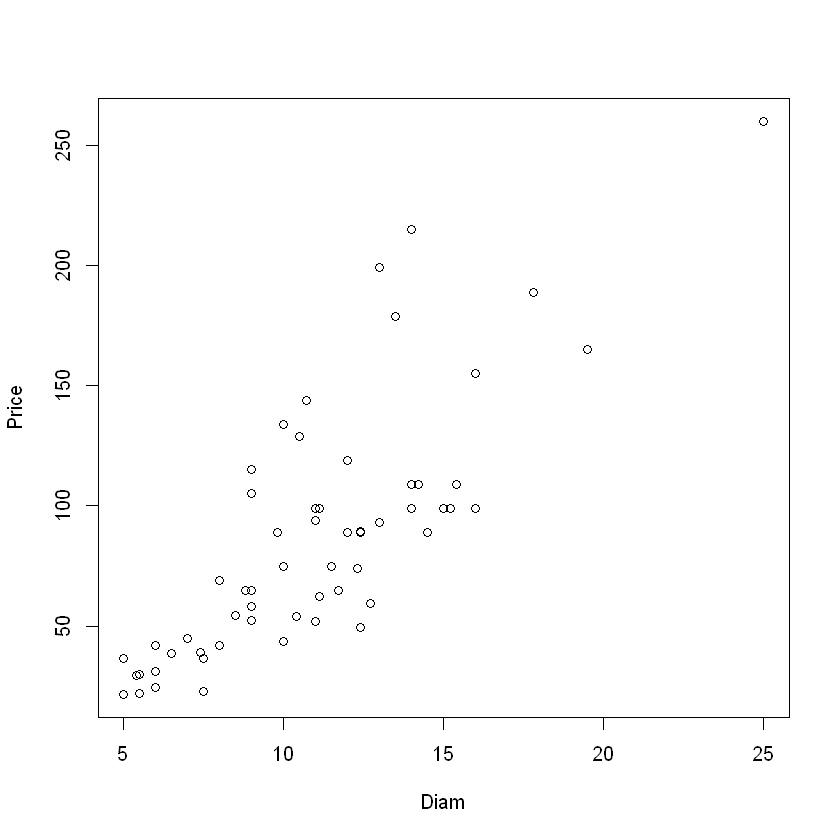

In [5]:
plot(Price ~ Diam, data=nambeware)

In [6]:
gamma.lm <- glm(Price ~ Diam, family = Gamma(link="log"), data=nambeware)

In [7]:
coef(summary(gamma.lm))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.9629331,0.15618048,18.971213,2.655723e-26
Diam,0.1272179,0.01349224,9.428973,3.100673e-13


In [8]:
gamma.m0 <- glm(Price ~ 1, family = Gamma(link="log"), data=nambeware)

In [9]:
summary(gamma.lm)$dispersion

[1] 0.1567253

In [11]:
diam.score.test <- glm.scoretest(gamma.m0, nambeware$Diam)
diam.p.value <- 2 * pt(-abs(diam.score.test), df=df.residual(gamma.m0))
diam.p.value

[1] 1.129986e-07

In [17]:
L = (deviance(gamma.m0) - deviance(gamma.lm))/summary(gamma.lm)$dispersion
L
diam.p.value.lr <- pf(L, df1=1, df2=df.residual(gamma.lm), lower.tail = FALSE)
diam.p.value.lr

[1] 79.59257

[1] 2.074969e-12

In [14]:
diam.p.value.lr

numeric(0)

In [18]:
deviance(gamma.lm)/df.residual(gamma.lm)
sum(gamma.lm$weights * gamma.lm$residuals^2)/df.residual(gamma.lm)

[1] 0.1367316

[1] 0.1567253

In [19]:
confint(gamma.lm)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),2.62262394,3.3054438
Diam,0.09774574,0.1574341


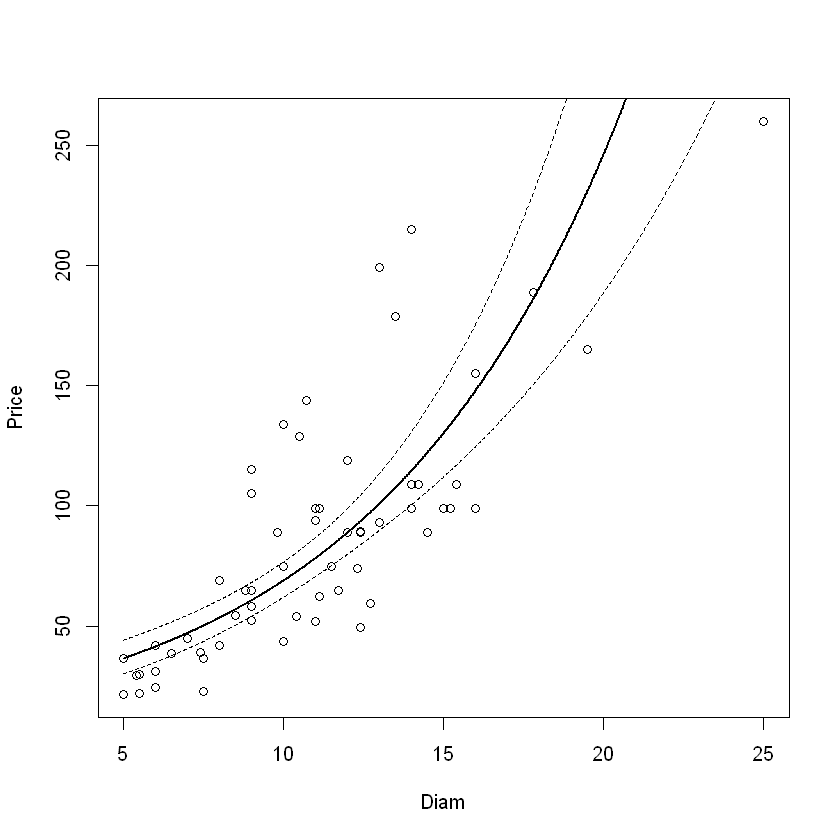

In [21]:
newDiam <- seq(min(nambeware$Diam), max(nambeware$Diam), length=1000)
newPrice <- predict(gamma.lm, newdata=data.frame(Diam=newDiam), se.fit=TRUE)
t.star <- qt(0.975, df=df.residual(gamma.lm))
ci.lo <- exp(newPrice$fit - t.star*newPrice$se.fit)
ci.hi <- exp(newPrice$fit + t.star*newPrice$se.fit)

plot(Price ~ Diam, data=nambeware)
lines(exp(newPrice$fit) ~ newDiam, lwd=2)
lines(ci.lo ~ newDiam, lty=2)
lines(ci.hi ~ newDiam, lty=2)